In [270]:
import numpy as np
import matplotlib.pyplot as plt
import pandas
from matplotlib.legend_handler import HandlerLine2D 
from toolbox.fourier_descriptors import reconstruct

In [118]:
dataset = pandas.read_csv('../dataset_norm.csv', delimiter=',').sort_values(by='move_type')
dataset.head()

,move_type,d_0,d_1,d_2,d_3,d_4,d_5,d_6,d_7,d_8,...,d_-10,d_-9,d_-8,d_-7,d_-6,d_-5,d_-4,d_-3,d_-2,d_-1
150,GO,2.170722e-16,1,0.384187,0.208813,0.216921,0.038474,0.110350,0.082350,0.097247,...,0.009643,0.048340,0.023341,0.128363,0.092402,0.060743,0.192700,0.030283,0.082370,0.066994
206,GO,1.849303e-16,1,0.318827,0.142795,0.089916,0.028816,0.116524,0.096799,0.066367,...,0.038999,0.037991,0.031443,0.057793,0.117156,0.110077,0.142238,0.076322,0.082293,0.120068
205,GO,2.640244e-16,1,0.252896,0.102374,0.027737,0.034839,0.062714,0.102908,0.059627,...,0.040863,0.019640,0.059791,0.043802,0.119923,0.051821,0.097050,0.069223,0.102702,0.170406
204,GO,2.730378e-16,1,0.327660,0.102242,0.027937,0.032844,0.111945,0.120641,0.036026,...,0.017423,0.021744,0.040593,0.011396,0.154387,0.088928,0.064369,0.077308,0.095720,0.182527
203,GO,3.719606e-16,1,0.357169,0.143961,0.071896,0.071706,0.130099,0.074283,0.085000,...,0.005645,0.004887,0.047136,0.067699,0.116815,0.142041,0.080959,0.091715,0.048963,0.155147


In [119]:
labels = dataset['move_type']

columns = [item for item in list(dataset.columns) if item!='move_type']
features = dataset[columns]
values = features.values

In [203]:
df  = dataset.drop('move_type', axis=1)
axe = np.array(range(-25,25))

In [277]:
descripteurs_complexes = []
for row_index,row in dataset.iterrows():
    y_col = row[[df.columns[i] for i in range(len(df.columns)) if (i+1)%2==0]].values
    x_col = row[[df.columns[i] for i in range(len(df.columns)) if ((i%2==0) or i==0)]].values
    desc = []
    for i in range(len(x_col)-1):
        c = np.complex(x_col[i],y_col[i])
        desc.append(c)
    descripteurs_complexes.append(desc)

In [278]:
reconstruct(descripteurs_complexes[1])

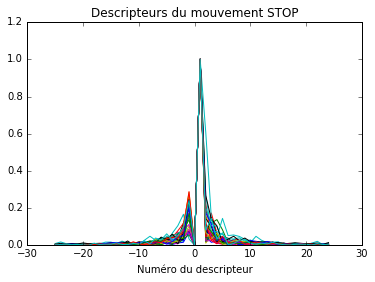

In [269]:
descripteurs = dataset.query('move_type=="STOP"').drop('move_type', axis=1)
it = 0
for row_index,row in descripteurs.iterrows():
    if it %8 ==0:
        valeurs = row.values
        to_plot = np.concatenate((valeurs[26:],valeurs[:25]), axis=0)
        plt.plot(axe,to_plot)
    it+=1
plt.title('Descripteurs du mouvement STOP')
plt.xlabel('Numéro du descripteur')
plt.savefig('desc_stop.png')
plt.show()


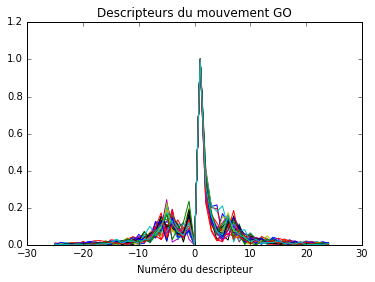

In [267]:
descripteurs = dataset.query('move_type=="GO"').drop('move_type', axis=1)
it = 0
for row_index,row in descripteurs.iterrows():
    if it %8==0:
        valeurs = row.values
        to_plot = np.concatenate((valeurs[26:],valeurs[:25]), axis=0)
        plt.plot(axe,to_plot)
    it+=1
plt.title('Descripteurs du mouvement GO')
plt.xlabel('Numéro du descripteur')

plt.savefig('desc_go.png')
plt.show()


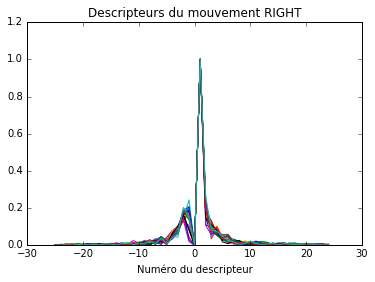

In [268]:
descripteurs = dataset.query('move_type=="RIGHT"').drop('move_type', axis=1)
it = 0
for row_index,row in descripteurs.iterrows():
    if it %8 ==0:
        valeurs = row.values
        to_plot = np.concatenate((valeurs[26:],valeurs[:25]), axis=0)
        plt.plot(axe, to_plot)
    it+=1
plt.title('Descripteurs du mouvement RIGHT')
plt.xlabel('Numéro du descripteur')
plt.savefig('desc_right.png')
plt.show()


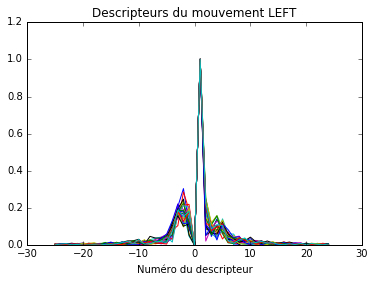

In [266]:
descripteurs = dataset.query('move_type=="LEFT"').drop('move_type', axis=1)
it = 0
for row_index,row in descripteurs.iterrows():
    if it %8 ==0:
        valeurs = row.values
        to_plot = np.concatenate((valeurs[26:],valeurs[:25]), axis=0)
        plt.plot(axe, to_plot)
    it+=1
plt.title('Descripteurs du mouvement LEFT')
plt.xlabel('Numéro du descripteur')
plt.savefig('desc_left.png')
plt.show()


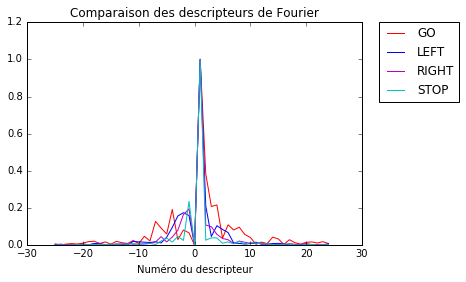

In [265]:
df_go = dataset.query('move_type=="GO"').drop('move_type', axis=1).values[0]
df_left = dataset.query('move_type=="LEFT"').drop('move_type', axis=1).values[0]
df_right = dataset.query('move_type=="RIGHT"').drop('move_type', axis=1).values[0]
df_stop = dataset.query('move_type=="STOP"').drop('move_type', axis=1).values[0]
go = np.concatenate((df_go[26:],df_go[:25]), axis=0)
left = np.concatenate((df_left[26:],df_left[:25]), axis=0)
right = np.concatenate((df_right[26:],df_right[:25]), axis=0)
stop = np.concatenate((df_stop[26:],df_stop[:25]), axis=0)

plot_go = plt.plot(axe, go,'r', label='GO')
plot_left = plt.plot(axe, left,'b', label='LEFT')
plot_right = plt.plot(axe, right,'m', label='RIGHT')
plot_stop = plt.plot(axe, stop,'c', label='STOP')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Comparaison des descripteurs de Fourier')
plt.xlabel('Numéro du descripteur')
plt.savefig('compare_descriptors.png')
plt.show()